In [1]:
import numpy as np
import matplotlib.pyplot as plt

from stoneforge.datasets import dataload
from stoneforge.vis import wellplot
from stoneforge.petrophysics import shale_volume
from stoneforge.pseudo_wells import lithology_generator, monte_carlo_simulations, pseudo_tools

In [2]:
IK1,unik1 = dataload.ik1()

IK1_c = IK1[~IK1.isin([-999.0]).any(axis=1)]
IK1_c

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
5050,2606.0,-49.0435,8.79390,8.61980,10.12370,58.4196,12.7783,2.2600,-0.2832,53.4228,93.7696
5051,2606.5,-50.4799,8.77080,8.59250,9.92250,59.8769,12.8500,2.2708,-0.3078,53.2102,93.4603
5052,2607.0,-52.1082,8.74770,8.53700,11.22560,61.2937,12.9218,2.2329,-0.3134,52.3063,92.4409
5053,2607.5,-51.1442,8.72480,8.48190,11.70970,63.3657,12.9935,2.2289,-0.2684,50.3678,92.9883
5054,2608.0,-47.5747,8.95780,8.42720,10.47900,65.9798,13.0652,2.2394,-0.1042,50.0560,93.7045
...,...,...,...,...,...,...,...,...,...,...,...
30506,15334.0,-11.3880,629.85712,1703.66248,1422.14807,16.8156,6.9289,2.6577,0.0468,-0.9550,54.3735
30507,15334.5,-5.4272,615.84058,1695.59717,1417.44800,16.3250,6.9282,2.6595,0.0582,-0.9549,47.2565
30508,15335.0,-7.8805,740.49573,1719.76306,1412.76270,15.7515,6.9275,2.6887,0.0742,-0.9566,41.9826
30509,15335.5,-9.9414,807.49799,1757.75037,1408.09375,15.6002,6.9268,2.6746,0.0637,-0.9584,38.9155


In [3]:
LEDGE_SANDSTONE = IK1_c[IK1_c['DEPT'].between(10619, 10842)]
LEDGE_SANDSTONE

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
21076,10619.0,-92.3719,5.6534,7.5047,10.3189,32.1681,9.5756,2.4324,0.0280,18.5964,74.0643
21077,10619.5,-92.6030,5.4512,7.1849,9.8774,29.9718,9.5682,2.4169,0.0243,18.5066,73.7811
21078,10620.0,-92.8108,5.2563,6.9832,9.3140,28.8898,9.5609,2.4278,0.0214,18.2585,73.3278
21079,10620.5,-93.0186,5.0684,6.7872,8.3432,28.8571,9.5536,2.4187,0.0232,18.0104,72.9256
21080,10621.0,-93.2263,4.9828,6.7115,7.1612,29.6683,9.5463,2.3921,0.0221,17.8458,73.9007
...,...,...,...,...,...,...,...,...,...,...,...
21518,10840.0,-84.3232,15.8031,24.9516,38.3127,38.1211,9.6802,2.5684,0.0246,9.2279,65.8097
21519,10840.5,-83.6495,18.1204,25.9377,29.7650,36.1407,9.6372,2.5561,0.0323,8.8146,63.3392
21520,10841.0,-82.9757,23.8513,37.9959,22.8938,36.0931,9.5941,2.5345,0.0364,8.6617,63.0884
21521,10841.5,-82.3019,24.9165,54.6157,25.3613,37.6945,9.5790,2.5176,0.0275,8.5357,63.5907


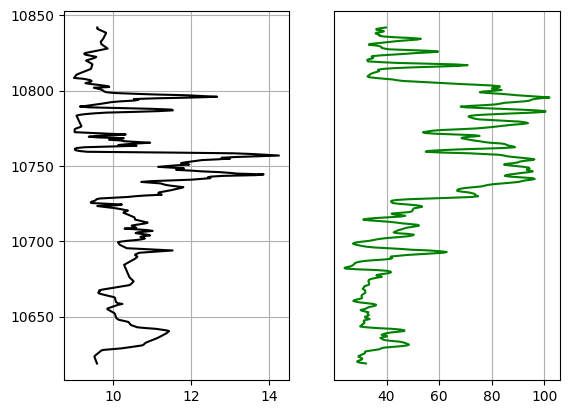

In [73]:
plt.subplot(1,2,1)
plt.plot(LEDGE_SANDSTONE['CALI'],LEDGE_SANDSTONE['DEPT'],'k')
plt.grid()

plt.subplot(1,2,2)
plt.plot(LEDGE_SANDSTONE['GR'],LEDGE_SANDSTONE['DEPT'],'g')
plt.yticks([])
plt.grid()

In [4]:
GR = np.array(IK1_c["GR"])
GR_min = np.percentile(GR, 10)
GR_max = np.percentile(GR, 90)

# Preparing data for VSH
GR = np.array(LEDGE_SANDSTONE["GR"])
GR_min = np.percentile(GR, 10)
GR_max = np.percentile(GR, 90)
print("GR_min:",GR_min,"|GR_max:",GR_max)

LEDGE_SANDSTONE["VSH_larionov_old"] = shale_volume.vshale(GR, GR_min, GR_max, "larionov_old")

GR_min: 30.78398 |GR_max: 88.65426000000001


C:\Users\mmram\AppData\Local\Temp\ipykernel_20692\3048360907.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEDGE_SANDSTONE["VSH_larionov_old"] = shale_volume.vshale(GR, GR_min, GR_max, "larionov_old")


In [5]:
lito = []
for i in np.array(LEDGE_SANDSTONE["VSH_larionov_old"]):
    if i <= 0.4:
        lito.append(49)
    if i > 0.4:
        lito.append(57)

LEDGE_SANDSTONE["lito"] = np.array(lito)

C:\Users\mmram\AppData\Local\Temp\ipykernel_20692\4044301724.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEDGE_SANDSTONE["lito"] = np.array(lito)


In [6]:
# Marcov Chain (in matrix)
M,st = lithology_generator.markov_chain(np.array(lito))
print(M, st)

[[0.98671096 0.01328904]
 [0.02758621 0.97241379]] [49, 57]


In [7]:
# Depth log
depth = np.arange(10600,10800,np.array(LEDGE_SANDSTONE["DEPT"])[1] - np.array(LEDGE_SANDSTONE["DEPT"])[0])

# Simple synthetic lito
lito_s = lithology_generator.simple(markov_chain=M,sampling=len(depth),lithology_code=st,initial_state=57)

# Calculate mean and standard deviation for each lithology considering the GR curve
stats = pseudo_tools.log_statstics(np.array(LEDGE_SANDSTONE["GR"]),np.array(LEDGE_SANDSTONE["lito"]))
stats

{49: [39.22508609271523, 8.626592603288847],
 57: [82.56617999999999, 9.547340961694065]}

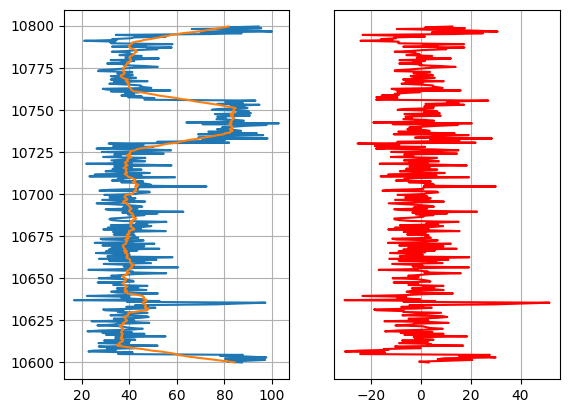

In [68]:
# Gaussian Monte Carlo GR log
S_GR = pseudo_tools.synthetic_log(stats, lithology = lito_s, seed=42)

# Smooth GR values
GR_smooth = pseudo_tools.moving_average(S_GR, step = 20)

# Taking the difference between the synthetic well log and the smooth trend values
dif_GR = S_GR - GR_smooth

plt.subplot(1,2,1)
plt.plot(S_GR,depth)
plt.plot(GR_smooth,depth)
plt.grid()

plt.subplot(1,2,2)
plt.plot(dif_GR,depth,'r')
plt.yticks([])
plt.grid()


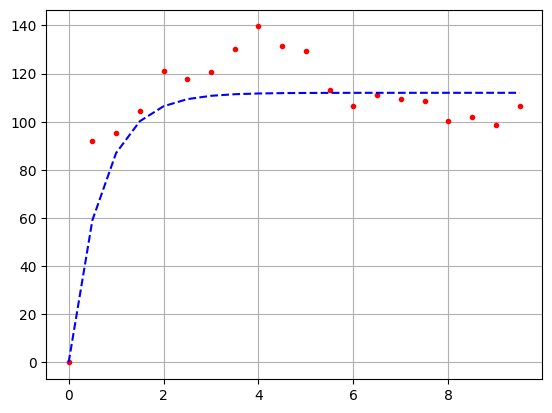

In [71]:
gm,dt = pseudo_tools.gamma_calc(dif_GR,depth,step=20)

var = monte_carlo_simulations.exponential_variogram_model(distance = dt, correlation_length =2, sill=112)

plt.plot(dt,gm,'r.')
plt.plot(dt,var,'b--')
plt.grid()

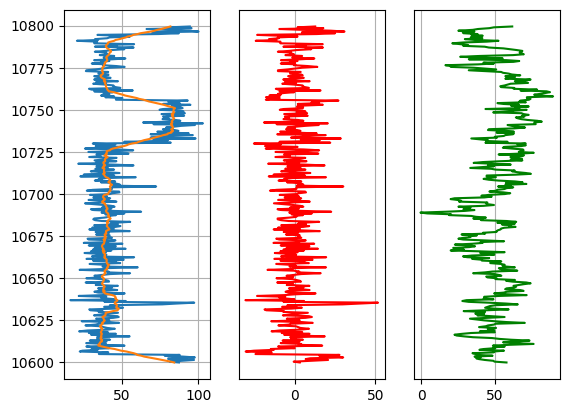

In [74]:
sill = 172
dist = 5.
nugget = 0.0

C = pseudo_tools.adjustment(depth,dist,sill)

C = np.array(C)

R = np.linalg.cholesky(C)

u = np.random.normal(0.0,1.0,len(GR_smooth))

Ru = np.dot(R,u)

GR_opt1 = np.array(pseudo_tools.moving_average(S_GR)) + Ru

plt.subplot(1,3,1)
plt.plot(S_GR,depth)
plt.plot(GR_smooth,depth)
plt.grid()

plt.subplot(1,3,2)
plt.plot(dif_GR,depth,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,3,3)
plt.plot(GR_opt1,depth,'g')
plt.yticks([])
plt.grid()